DFT-2D

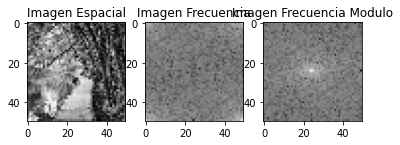

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def imageConvert2Show(A):
    Amin = np.min(A)
    Amax = np.max(A)
    return np.uint8(np.dot(np.divide(np.subtract(A, Amin), np.subtract(Amax, Amin)), 255))

def dft2d():
    # Esta funcion calcula la transformada discreta de Fourier
    # de una imagen a escala de grises

    A = cv2.imread('../Imagenes/paisaje.jpg', cv2.IMREAD_GRAYSCALE)
    m, n = A.shape

    A = np.double(A)
    F = np.zeros((m, n), dtype = 'complex_')

    for u in range(1, m + 1):
        for v in range(1, n + 1):
            for x in range(m):
                for y in range(n):
                    F[u - 1, v - 1] += A[x, y] * np.exp(-1 * 1j * 2 * np.pi * ((u * x / m) + (v * y / n)))

    Ffreq = np.log(1 + np.abs(F))
    Ffreq = imageConvert2Show(Ffreq)

    Fshift = np.log(1 + np.abs(np.fft.fftshift(F)))
    Fshift = imageConvert2Show(Fshift)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(A, cmap='gray')
    ax1.set_title('Imagen Espacial')
    ax2.imshow(Ffreq, cmap='gray')
    ax2.set_title('Imagen Frecuencia')
    ax3.imshow(Fshift, cmap='gray')
    ax3.set_title('Imagen Frecuencia Modulo')

    plt.show()

    return

# Ejemplo
dft2d()

Filtro Gaussiano Paso Bajo

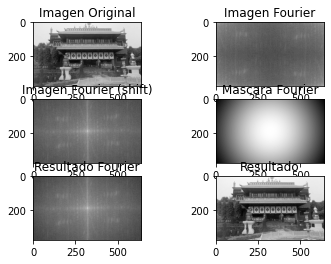

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def imageConvert2Show(A):
    Amin = np.min(A)
    Amax = np.max(A)
    return np.uint8(np.dot(np.divide(np.subtract(A, Amin), np.subtract(Amax, Amin)), 255))

def filtroPasoBajoGaussiano(sigma):
    # Esta funcion aplica el filtro gaussiano ideal a una imagen en escala de grises
    # Parametros de entrada: sigma = valor del radio del
    #                        circulo del filtro pasobajo gaussiano

    fig, ax = plt.subplots(3, 2)

    A = cv2.imread('../Imagenes/edificio_china.jpg', cv2.IMREAD_GRAYSCALE)
    ax[0, 0].imshow(A, cmap='gray')
    ax[0, 0].set_title('Imagen Original')

    A = np.double(A)
    F = np.fft.fft2(A)
    ax[0, 1].imshow(imageConvert2Show(np.log(1 + np.abs(F))), cmap='gray')
    ax[0, 1].set_title('Imagen Fourier') 
    
    Fshift = np.fft.fftshift(F)
    ax[1, 0].imshow(imageConvert2Show(np.log(1 + np.abs(Fshift))), cmap='gray')
    ax[1, 0].set_title('Imagen Fourier (shift)') 

    m, n = A.shape
    D = np.zeros((m ,n))
    for u in range(1, m + 1):
        for v in range(1, n + 1):
            D[u - 1, v - 1] = np.sqrt((u - (m / 2)) ** 2 + (v - (n / 2)) ** 2)

    Fmask = np.exp(np.divide(np.dot(np.power(D, 2), -1), 2 * (sigma ** 2)))
    ax[1, 1].imshow(imageConvert2Show(np.log(1 + np.abs(Fmask))), cmap='gray')
    ax[1, 1].set_title('Mascara Fourier')

    Fmask = np.fft.fftshift(Fmask)

    Fresult = np.fft.fftshift(np.multiply(F, Fmask))
    ax[2, 0].imshow(imageConvert2Show(np.log(1 + np.abs(Fresult))), cmap='gray')
    ax[2, 0].set_title('Resultado Fourier')

    Fresult = np.fft.fftshift(Fresult)

    B = np.fft.ifft2(Fresult)
    B = np.uint8(np.abs(B))
    ax[2, 1].imshow(B, cmap='gray')
    ax[2, 1].set_title('Resultado')

    plt.show()

    return

# Ejemplo
filtroPasoBajoGaussiano(230)


Filtro Ideal Paso Alto

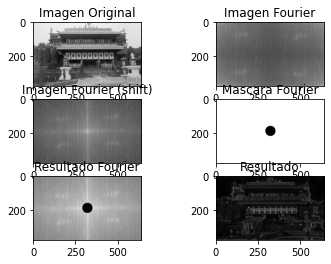

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def imageConvert2Show(A):
    Amin = np.min(A)
    Amax = np.max(A)
    return np.uint8(np.dot(np.divide(np.subtract(A, Amin), np.subtract(Amax, Amin)), 255))

def filtroPasoAltoIdeal(D0):
    # Esta funcion aplica el filtro paso alto ideal a una imagen en escala de grises
    # Parametros de entrada: D0 = valor del radio del
    #                        circulo del filtro paso alto ideal

    fig, ax = plt.subplots(3, 2)

    A = cv2.imread('../Imagenes/edificio_china.jpg', cv2.IMREAD_GRAYSCALE)
    ax[0, 0].imshow(A, cmap='gray')
    ax[0, 0].set_title('Imagen Original')

    A = np.double(A)
    F = np.fft.fft2(A)
    ax[0, 1].imshow(imageConvert2Show(np.log(1 + np.abs(F))), cmap='gray')
    ax[0, 1].set_title('Imagen Fourier') 
    
    Fshift = np.fft.fftshift(F)
    ax[1, 0].imshow(imageConvert2Show(np.log(1 + np.abs(Fshift))), cmap='gray')
    ax[1, 0].set_title('Imagen Fourier (shift)') 

    m, n = A.shape
    D = np.zeros((m ,n))
    for u in range(1, m + 1):
        for v in range(1, n + 1):
            D[u - 1, v - 1] = np.sqrt((u - (m / 2)) ** 2 + (v - (n / 2)) ** 2)

    Fmask = np.greater(D, D0)
    ax[1, 1].imshow(imageConvert2Show(np.log(1 + np.abs(Fmask))), cmap='gray')
    ax[1, 1].set_title('Mascara Fourier')

    Fmask = np.fft.fftshift(Fmask)

    Fresult = np.fft.fftshift(np.multiply(F, Fmask))
    ax[2, 0].imshow(imageConvert2Show(np.log(1 + np.abs(Fresult))), cmap='gray')
    ax[2, 0].set_title('Resultado Fourier')

    Fresult = np.fft.fftshift(Fresult)

    B = np.fft.ifft2(Fresult)
    B = np.uint8(np.abs(B))
    ax[2, 1].imshow(B, cmap='gray')
    ax[2, 1].set_title('Resultado')

    plt.show()

    return

# Ejemplo
filtroPasoAltoIdeal(30)

Filtro Butterworth Paso Alto 

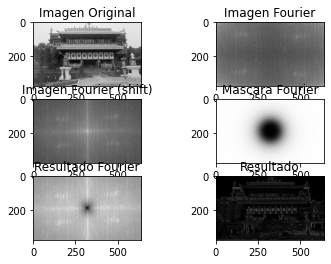

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def imageConvert2Show(A):
    Amin = np.min(A)
    Amax = np.max(A)
    return np.uint8(np.dot(np.divide(np.subtract(A, Amin), np.subtract(Amax, Amin)), 255))

def filtroPasoAltoButterworth(D0, o):
    # Esta funcion aplica el filtro paso alto butterworth a una imagen en escala de grises
    # Parametros de entrada: D0 = valor del radio del
    #                        circulo del filtro paso alto butterworth
    #                        o = orden del filtro

    fig, ax = plt.subplots(3, 2)

    A = cv2.imread('../Imagenes/edificio_china.jpg', cv2.IMREAD_GRAYSCALE)
    ax[0, 0].imshow(A, cmap='gray')
    ax[0, 0].set_title('Imagen Original')

    A = np.double(A)
    F = np.fft.fft2(A)
    ax[0, 1].imshow(imageConvert2Show(np.log(1 + np.abs(F))), cmap='gray')
    ax[0, 1].set_title('Imagen Fourier') 
    
    Fshift = np.fft.fftshift(F)
    ax[1, 0].imshow(imageConvert2Show(np.log(1 + np.abs(Fshift))), cmap='gray')
    ax[1, 0].set_title('Imagen Fourier (shift)') 

    m, n = A.shape
    D = np.zeros((m ,n))
    for u in range(1, m + 1):
        for v in range(1, n + 1):
            D[u - 1, v - 1] = np.sqrt((u - (m / 2)) ** 2 + (v - (n / 2)) ** 2)

    Fmask = np.divide(1, np.add(1, np.power(np.divide(D0, D), 2 * o)))
    ax[1, 1].imshow(imageConvert2Show(np.log(1 + np.abs(Fmask))), cmap='gray')
    ax[1, 1].set_title('Mascara Fourier')

    Fmask = np.fft.fftshift(Fmask)

    Fresult = np.fft.fftshift(np.multiply(F, Fmask))
    ax[2, 0].imshow(imageConvert2Show(np.log(1 + np.abs(Fresult))), cmap='gray')
    ax[2, 0].set_title('Resultado Fourier')

    Fresult = np.fft.fftshift(Fresult)

    B = np.fft.ifft2(Fresult)
    B = np.uint8(np.abs(B))
    ax[2, 1].imshow(B, cmap='gray')
    ax[2, 1].set_title('Resultado')

    plt.show()

    return

# Ejemplo
np.seterr(divide='ignore', invalid='ignore')
filtroPasoAltoButterworth(80, 2)